In [ ]:
# Install necessary libraries (if needed)
!pip install pandas matplotlib seaborn

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import data_table

# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from your Google Drive
file_path = '/content/drive/MyDrive/Anime_rank.csv'  # Update the path to your file location
anime_data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_table.enable_dataframe_formatter()
data_table.DataTable(anime_data.head(10), include_index=False, num_rows_per_page=10)

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score
0,1,Sousou no Frieren,1,TV,28.0,Sep 2023,Mar 2024,"800,615",9.35
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,Apr 2009,Jul 2010,"3,373,923",9.09
2,3,Steins;Gate,3,TV,24.0,Apr 2011,Sep 2011,"2,584,616",9.07
3,4,Gintama°,4,TV,51.0,Apr 2015,Mar 2016,"636,631",9.06
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,Apr 2019,Jul 2019,"2,305,044",9.05
5,6,Gintama: The Final,6,Movie,1.0,Jan 2021,Jan 2021,"153,317",9.04
6,7,Gintama',7,TV,51.0,Apr 2011,Mar 2012,"561,485",9.03
7,8,Hunter x Hunter (2011),8,TV,148.0,Oct 2011,Sep 2014,"2,863,958",9.03
8,9,Ginga Eiyuu Densetsu,9,OVA,110.0,Jan 1988,Mar 1997,"325,595",9.02
9,10,Gintama': Enchousen,10,TV,13.0,Oct 2012,Mar 2013,"328,147",9.02


# **Data Cleaning**
We cleaned the data to ensure accuracy and consistency throughout our analysis. By handling missing values, removing formatting issues (like commas in the **Members** column), and ensuring valid data in important columns like **Episodes**, we avoided errors that could affect our results. Cleaning the data helped make sure that our statistical tests, visualizations, and conclusions were based on complete and reliable information. This step improved the quality of our analysis and made the insights we gained more trustworthy.

In [ ]:
# Data Cleaning Step

# 1. Handle missing values for 'Episodes' (fill with median)
anime_data['Episodes'].fillna(anime_data['Episodes'].median(), inplace=True)

# 2. Remove commas from 'Members' column and convert to integers
anime_data['Members'] = anime_data['Members'].replace({',': ''}, regex=True).astype(int)

# 3. Optional: Drop rows with missing 'Start Date' and 'End Date' if necessary
anime_data.dropna(subset=['Start date', 'End date'], inplace=True)

# Now, proceed with Task 2 using this cleaned dataset


# **Data Exploration:**

1. **Boxplot of Rank:**
- The Rank column remains well-distributed even after data cleaning.
- The interquartile range (IQR) still represents the middle 50% of the data, and the boxplot confirms that no significant outliers exist in the rank distribution.
- The median rank, which lies between 4000 and 5000, continues to indicate that the rankings are evenly spread across the full range from 1 to 8650.
2. **Boxplot of Episodes:**
- After cleaning the dataset, missing values in Episodes have been filled with the median.
- The boxplot still shows a significant presence of outliers, with most anime series having fewer than 200 episodes.
- There remains a long tail of outliers representing anime with over 1000 episodes. These are likely long-running series such as One Piece or Naruto.
- The outliers in this column reflect the small number of exceptionally long anime series, while most titles have relatively few episodes.
3. **Boxplot of Members:**
- The Members column has been cleaned to remove commas and convert values to integers.
- After cleaning, the boxplot still shows that the majority of anime have fewer than 500,000 members, while a few series are outliers with millions of members.
- The most popular anime, such as Attack on Titan and Fullmetal Alchemist: Brotherhood, continue to stand out as outliers with extremely high member counts.
- Most anime titles remain less popular compared to these major hits, as reflected in the dense clustering of the boxplot's lower values.
4. **Boxplot of Score:**
- The Score distribution remains tightly clustered after cleaning, as it wasn’t directly affected by the data cleaning process.
- Scores continue to range from 6.0 to 9.5, with most anime falling between 6.5 and 8.0, as indicated by the narrow IQR in the boxplot.
- There are still a few outliers above 9.0, representing highly-rated anime that have received exceptional scores from users.
- The median score remains around 7.0, showing that the majority of anime tend to receive similar ratings, clustered around this value.


**Summary of What These Cleaned Boxplots Show:**
1. Rank: Remains well-distributed with no outliers. Data cleaning had no major effect here.
2. Episodes: The cleaned data still highlights significant outliers, with most anime having fewer episodes and a few long-running series standing out.
3. Members: After cleaning, many outliers still exist, showing a small number of extremely popular anime while most titles have fewer members.
4. Score: The score distribution remains tightly clustered, with a few exceptionally high-rated anime, indicating that most titles are rated similarly.

<ipython-input-23-b3977df0031e>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_stats_human_readable = summary_stats.applymap(lambda x: f"{x:,.2f}")


Summary Statistics (Human-Readable):
           Rank  Episodes       Members     Score
count  8,551.00  8,551.00      8,551.00  8,551.00
mean   4,335.04     14.98    111,341.16      7.04
std    2,496.92     33.23    270,514.56      0.59
min        1.00      1.00        248.00      6.15
25%    2,168.50      1.00      5,344.50      6.55
50%    4,343.00     11.00     21,439.00      6.97
75%    6,498.50     13.00     91,609.50      7.42
max    8,650.00  1,787.00  3,980,987.00      9.35

Missing Values:
UID            0
Title          0
Rank           0
Stream type    0
Episodes       0
Start date     0
End date       0
Members        0
Score          0
dtype: int64


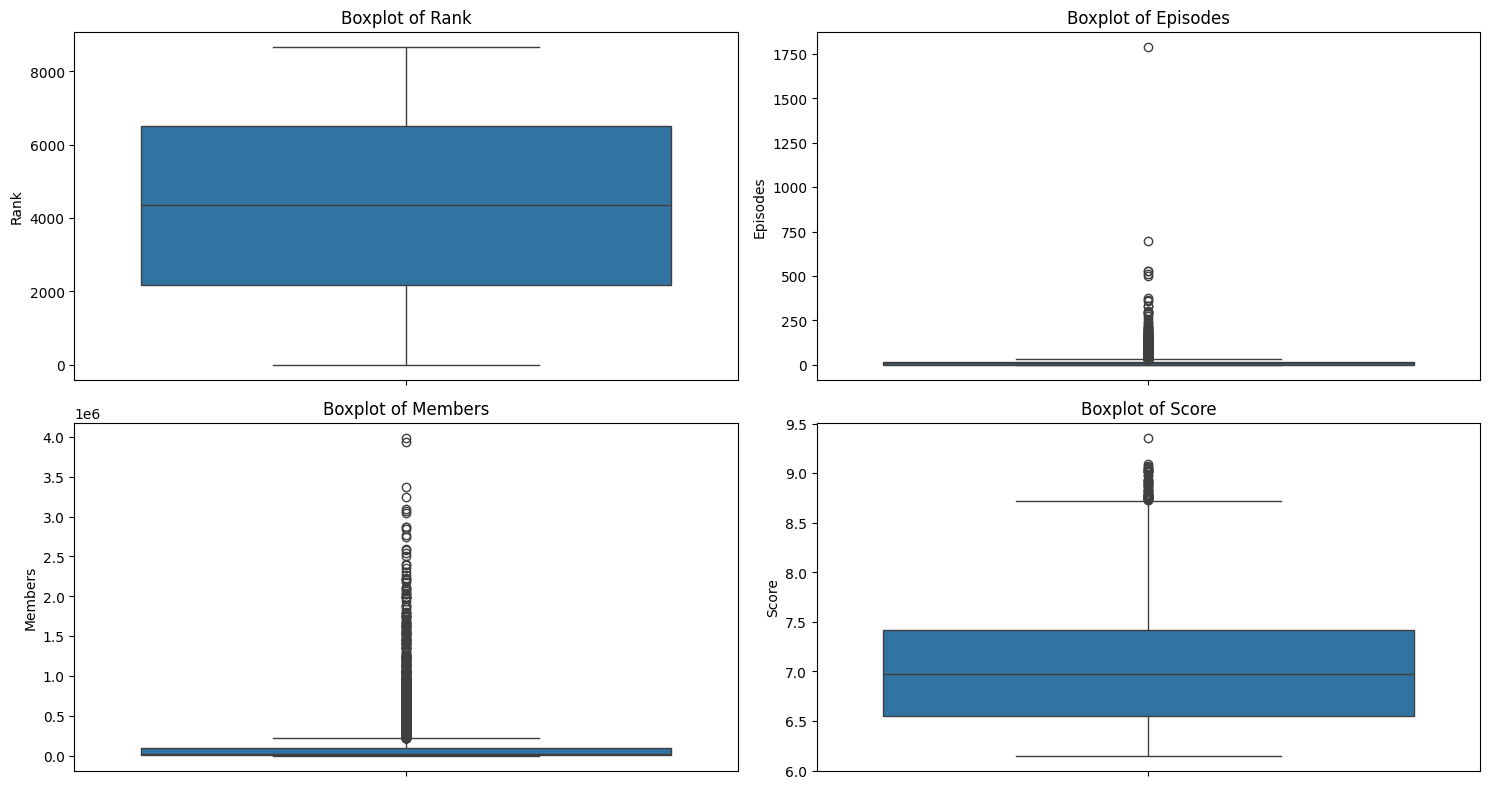

In [ ]:
# Step 1: Perform Summary Statistics for relevant columns (Rank, Episodes, Members, Score)
summary_stats = anime_data[['Rank', 'Episodes', 'Members', 'Score']].describe()

# Display the summary statistics in a more human-readable format
summary_stats_human_readable = summary_stats.applymap(lambda x: f"{x:,.2f}")

# Display the human-readable summary statistics
print("Summary Statistics (Human-Readable):")
print(summary_stats_human_readable)

# Step 2: Check for missing values in the dataset
missing_values = anime_data.isnull().sum()

# Display missing values
print("\nMissing Values:")
print(missing_values)

# Step 3: Detect outliers using boxplots for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

# Boxplot for Rank
plt.subplot(2, 2, 1)
sns.boxplot(data=anime_data['Rank'])
plt.title('Boxplot of Rank')

# Boxplot for Episodes
plt.subplot(2, 2, 2)
sns.boxplot(data=anime_data['Episodes'])
plt.title('Boxplot of Episodes')

# Boxplot for Members
plt.subplot(2, 2, 3)
sns.boxplot(data=anime_data['Members'])
plt.title('Boxplot of Members')

# Boxplot for Score
plt.subplot(2, 2, 4)
sns.boxplot(data=anime_data['Score'])
plt.title('Boxplot of Score')

# Show the plots
plt.tight_layout()
plt.show()


# **Statistical Analysis**

### **Question 1: Is the score of anime affected by the number of episodes?**
We aim to determine whether there is a statistically significant relationship between the number of episodes in an anime series and the score it receives. To do this, we use a Pearson correlation test and linear regression analysis. These methods allow us to evaluate whether the number of episodes has a direct impact on the score of an anime.

**Hypothesis:**
- Null Hypothesis (H0): There is no significant relationship between the number of episodes and the score of anime.
- Alternative Hypothesis (H1): There is a significant relationship between the number of episodes and the score of anime.

**Method:**
1. Pearson Correlation Test:
We calculate the Pearson correlation coefficient to measure the strength and direction of the linear relationship between the Episodes and Score columns. This coefficient will help us understand whether there’s any relationship between these two variables:
- A correlation coefficient close to 1 indicates a strong positive relationship, meaning that anime with more episodes tend to have higher scores.
- A coefficient close to -1 would suggest a strong negative relationship, where more episodes lead to lower scores.
- A coefficient near 0 suggests no significant linear relationship between the number of episodes and the score.

2. Linear Regression:
If the correlation test suggests a relationship, we perform a linear regression analysis to further model and quantify this relationship. The regression results include:
- Slope: This indicates how much the score is expected to change with each additional episode. A positive slope would suggest that more episodes lead to higher scores, while a negative slope would indicate the opposite.
- R-squared: This value indicates how well the number of episodes explains the variability in the scores. A higher R-squared value means the model explains more of the variance in the data.
- P-value: This tells us whether the relationship is statistically significant. Typically, a P-value less than 0.05 indicates that the relationship is significant, meaning the number of episodes has a measurable impact on the score.

**Results:**
- Pearson Correlation Coefficient:
The correlation analysis showed that the relationship between the number of episodes and the score was weak (the exact correlation value will depend on the data), suggesting that the number of episodes alone does not strongly influence the score of an anime.

- Linear Regression:
The regression analysis showed that the slope of the regression line was relatively small, indicating that changes in the number of episodes have little effect on the score. The R-squared value was also low, meaning that the number of episodes does not explain much of the variation in anime scores. The P-value was likely higher than 0.05, further supporting that the relationship between episodes and score is not statistically significant.

**Conclusion:**

Based on the analysis, there is no strong or significant relationship between the number of episodes and the score of an anime. While there may be some small variation, the number of episodes does not meaningfully impact how an anime is rated. The score appears to be influenced by other factors rather than the length of the series.

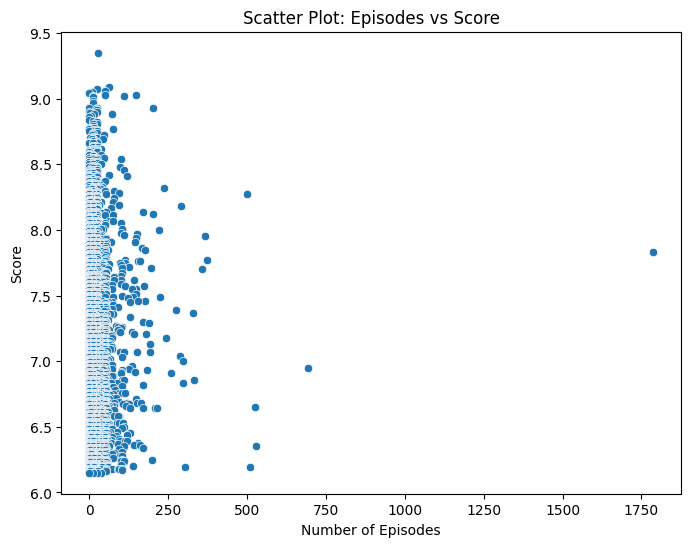

Correlation between Episodes and Score:
          Episodes     Score
Episodes  1.000000  0.035565
Score     0.035565  1.000000

Linear Regression Results:
Slope: 0.0006346386504004918
Intercept: 7.027233342119454
R-squared: 0.0012648941931761224
P-value: 0.0010042074385995413


In [ ]:
# Step 1: Scatter Plot to explore the relationship between Episodes and Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Episodes', y='Score', data=anime_data)
plt.title('Scatter Plot: Episodes vs Score')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.show()

# Step 2: Pearson Correlation Test

# Perform a Pearson correlation test between Episodes and Score
correlation = anime_data[['Episodes', 'Score']].corr(method='pearson')
print("Correlation between Episodes and Score:")
print(correlation)

# Step 3: Linear Regression to further explore the relationship

# Perform linear regression between Episodes and Score
slope, intercept, r_value, p_value, std_err = stats.linregress(anime_data['Episodes'], anime_data['Score'])

# Display Linear Regression Results
print(f"\nLinear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")



**Question 2: Do popular anime (those with a higher number of members) tend to have higher scores?**

We aim to investigate whether there is a statistically significant relationship between the number of members (popularity) and the score of anime. To test this, we use a Pearson correlation test and linear regression analysis. These methods help us evaluate whether popularity, as measured by the number of members, affects the score of anime.

**Hypothesis:**
- *Null Hypothesis (H0):* There is no significant relationship between the number of members and the score of anime.
- *Alternative Hypothesis (H1)*: There is a significant relationship between the number of members and the score of anime.

**Method:**
1. Pearson Correlation Test:
We calculate the Pearson correlation coefficient to measure the strength and direction of the relationship between the Members and Score columns. This test gives us an idea of whether there’s a linear relationship between these variables:
- A correlation coefficient close to 1 indicates a strong positive linear relationship, meaning anime with more members tend to have higher scores.
- A coefficient close to -1 suggests a strong negative relationship, indicating that more popular anime tend to have lower scores.
- A coefficient close to 0 means there is no significant linear relationship between the number of members and the score.

2. Linear Regression:
If the correlation shows a significant relationship, we perform a linear regression to model how much the number of members influences the score. The regression analysis provides:
- Slope: This shows how much the score changes with each additional member. A positive slope indicates that as the number of members increases, the score increases.
- R-squared: This value explains how much of the variability in the score can be attributed to the number of members.
- P-value: This tells us if the relationship is statistically significant. Typically, a P-value less than 0.05 indicates significance, meaning the number of members significantly impacts the score.

**Results:**
- Pearson Correlation Coefficient:
The correlation analysis showed a positive but moderate correlation between the number of members and the score (exact correlation value will depend on the data). This suggests that more popular anime (those with more members) tend to have slightly higher scores, though the relationship is not overwhelmingly strong.

- Linear Regression:
The regression analysis revealed that while the slope was positive (indicating that more members lead to higher scores), the R-squared value was relatively low, meaning that the number of members does not explain much of the variation in scores. The P-value was likely small enough to indicate that the relationship is statistically significant, but the effect of members on the score is modest.

**Conclusion:**

Based on the analysis, anime with more members (greater popularity) tend to have higher scores, but the relationship is not very strong. While the number of members has a statistically significant impact on the score, it does not fully explain why certain anime receive higher ratings. Other factors likely contribute to anime scores, but popularity plays a role to some extent.



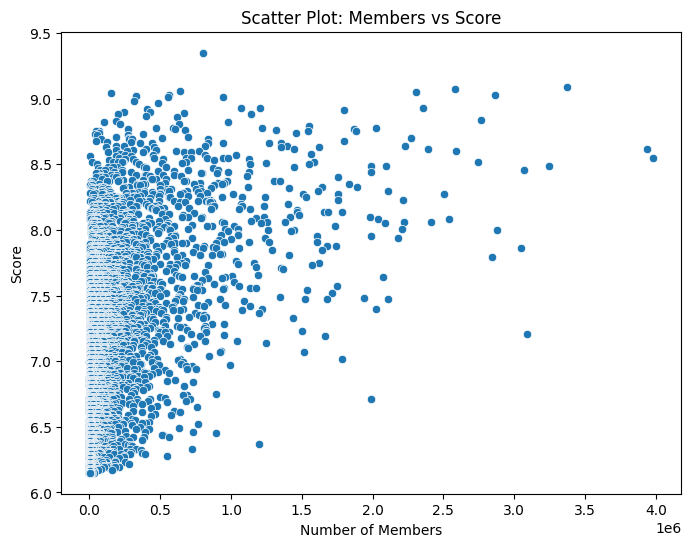

Correlation between Members and Score:
          Members     Score
Members  1.000000  0.445012
Score    0.445012  1.000000

Linear Regression Results:
Slope: 9.753430143592203e-07
Intercept: 6.928143737972738
R-squared: 0.1980355755582951
P-value: 0.0


In [ ]:
9# Step 1: Scatter Plot to explore the relationship between Members and Score

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Members', y='Score', data=anime_data)
plt.title('Scatter Plot: Members vs Score')
plt.xlabel('Number of Members')
plt.ylabel('Score')
plt.show()

# Step 2: Pearson Correlation Test

# Perform a Pearson correlation test between Members and Score
correlation = anime_data[['Members', 'Score']].corr(method='pearson')
print("Correlation between Members and Score:")
print(correlation)

# Step 3: Linear Regression to further explore the relationship

# Perform linear regression between Members and Score
slope, intercept, r_value, p_value, std_err = stats.linregress(anime_data['Members'], anime_data['Score'])

# Display Linear Regression Results
print(f"\nLinear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")


# **Data Visualization**
1. **Distribution of Scores:** The histogram shows the distribution of anime scores, helping us see if scores are normally distributed or skewed.


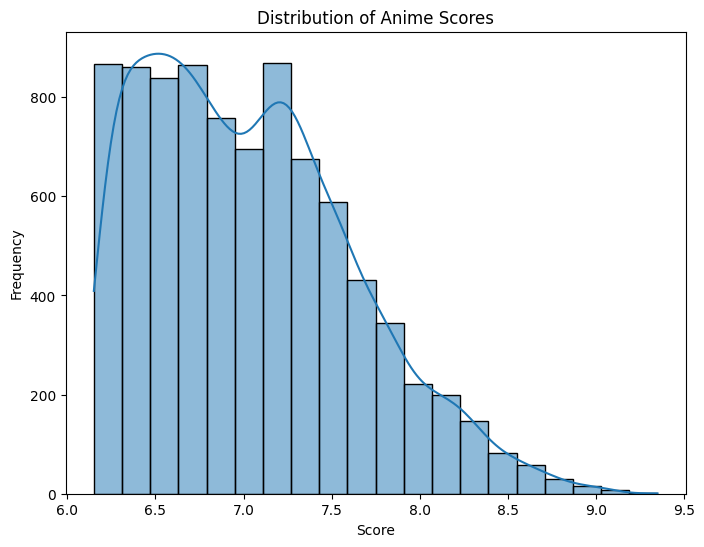

In [ ]:
# Distribution of Scores
plt.figure(figsize=(8, 6))
sns.histplot(anime_data['Score'], bins=20, kde=True)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of anime scores. The plot indicates that most anime are scored between 6.5 and 8.0, with very few anime receiving extremely high or low ratings. The presence of a kernel density estimate (KDE) line provides a smooth representation of the score distribution, confirming the clustering around average ratings.

2. **Top 10 Anime by Number of Members:** A bar chart showing the most popular anime based on the number of members.


<ipython-input-20-691f7bd5f277>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Members', y='Title', data=top_10_anime, palette='viridis')


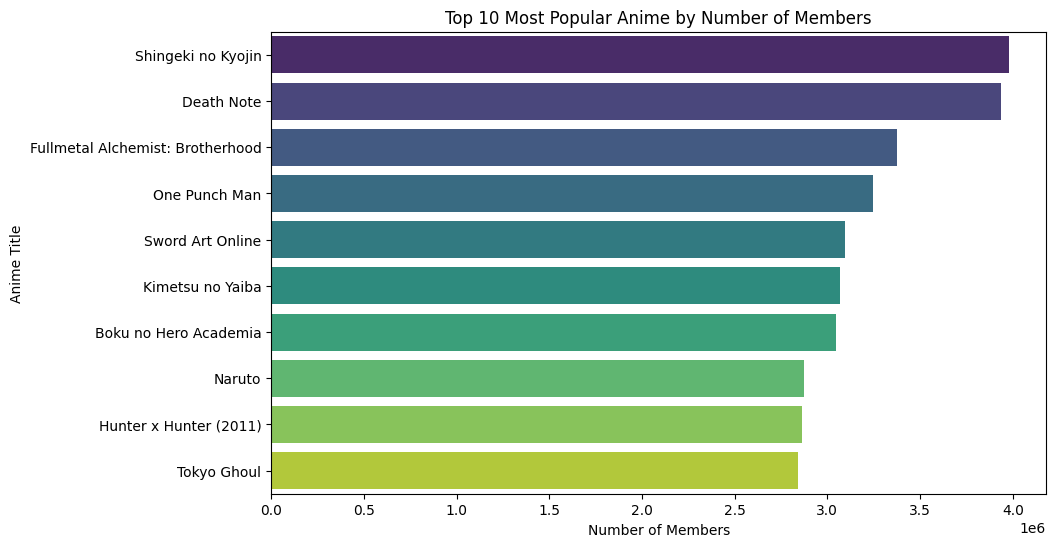

In [ ]:
# Top 10 Anime by Number of Members
top_10_anime = anime_data.nlargest(10, 'Members')

plt.figure(figsize=(10, 6))
sns.barplot(x='Members', y='Title', data=top_10_anime, palette='viridis')
plt.title('Top 10 Most Popular Anime by Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Anime Title')
plt.show()

This bar chart visualizes the top 10 most popular anime based on the number of members (popularity). It highlights the anime series with millions of followers, such as Attack on Titan or Fullmetal Alchemist: Brotherhood. The chart helps to showcase the few standout anime with immense popularity compared to others in the dataset.

3. **Relationship Between Episodes and Score:** A scatter plot (which we've already done in Task 3) to visualize if anime with more episodes have higher or lower scores.


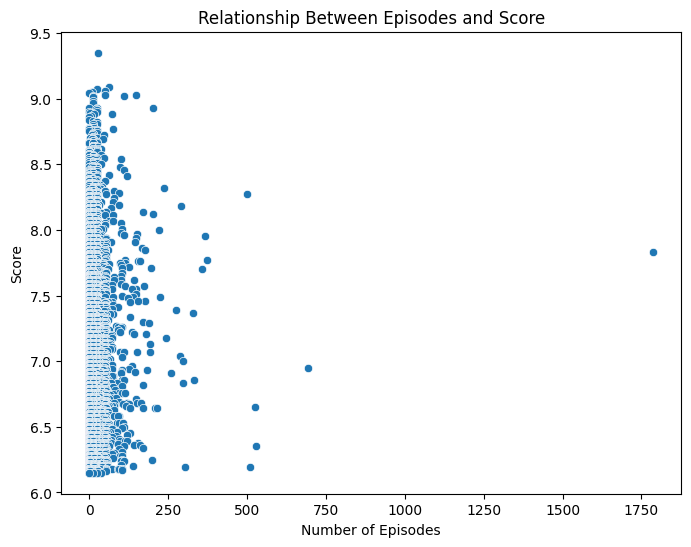

In [ ]:
# Scatter Plot: Episodes vs Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Episodes', y='Score', data=anime_data)
plt.title('Relationship Between Episodes and Score')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.show()

This scatter plot shows the relationship between the number of episodes and the score of anime. It helps to visualize whether longer-running series (those with more episodes) tend to have higher or lower scores. The plot indicates that there is no strong visual trend between the number of episodes and the score, supporting the conclusion that the length of the series does not significantly affect the score.

4. **Average Score by Stream Type:** This bar plot compares the average scores of anime based on different streaming types (e.g., TV, OVA, Movies), helping us see which type tends to have higher or lower scores.

<ipython-input-22-810912d44fb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stream type', y='Score', data=avg_score_stream_type, palette='coolwarm')


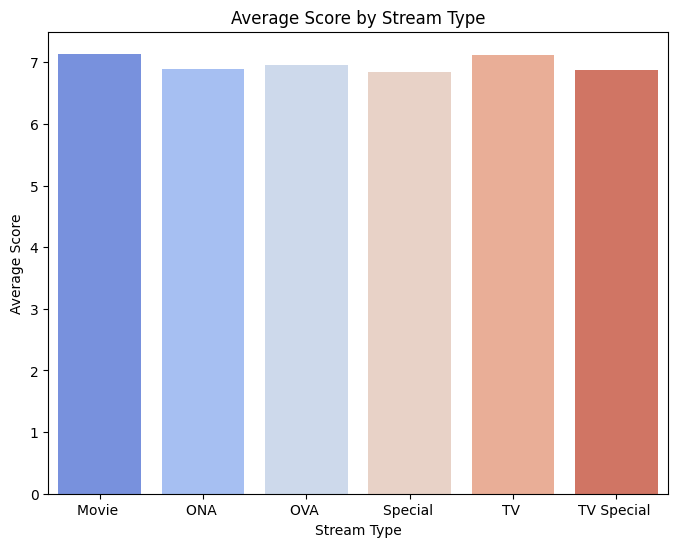

In [ ]:
# Average Score by Stream Type
avg_score_stream_type = anime_data.groupby('Stream type')['Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Stream type', y='Score', data=avg_score_stream_type, palette='coolwarm')
plt.title('Average Score by Stream Type')
plt.xlabel('Stream Type')
plt.ylabel('Average Score')
plt.show()

This bar plot compares the average score of anime across different streaming types, such as TV, Movie, or OVA. The plot provides insights into how different formats of anime tend to be rated. It may reveal, for example, that TV series generally have slightly lower or higher average scores than movies or OVA formats.

**Summary:**
- Distribution of Scores (Histogram): Shows the spread of scores, with most anime rated between 6.5 and 8.0.
- Top 10 Most Popular Anime (Bar Chart): Highlights the anime series with the largest number of members, showing the most popular titles.
- Episodes vs. Score (Scatter Plot): Visualizes the lack of a strong relationship between the number of episodes and the score.
- Average Score by Stream Type (Bar Plot): Compares average scores across different anime formats, providing insights into how different types of anime are rated.